# Libary import

In [28]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [43]:
df = pd.read_csv('../../documents_data.csv')

In [61]:
df['Date'] = pd.to_datetime(df['Date'].str.split().str[0], format='%Y-%m-%d')
df = df[df['Content'].notna()]

AttributeError: Can only use .str accessor with string values!

In [56]:
df.sort_values(by='Date', inplace=True)

In [57]:
df['Date']

37278   1980-07-17
37279   1981-03-30
37280   1981-03-31
37281   1981-03-31
37282   1981-04-02
           ...    
25513   2024-09-19
25509   2024-09-19
25508   2024-09-19
25510   2024-09-19
25514   2024-09-19
Name: Date, Length: 67337, dtype: datetime64[ns]

In [58]:
df.head()

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link
37278,Ambassador Bush's Informal Remarks to the New ...,1980-07-17,Just a few minutes before he appeared at the c...,"George Bush, Ambassador Bush's Informal Remark...",George Bush,"Vice Presidential Candidates, Elections and Tr...","Campaign Remarks & Rallies, , LocationMichigan",Michigan,https://www.presidency.ucsb.edu/documents/amba...
37279,Statement by the Vice President About the Atte...,1981-03-30,"Well, I have a very brief statement that I wou...","George Bush, Statement by the Vice President A...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, Watch Video, LocationWashingt...","Washington, DC",https://www.presidency.ucsb.edu/documents/stat...
37280,Exchange Between the Vice President and Report...,1981-03-31,The Vice President. The medical reports were v...,"George Bush, Exchange Between the Vice Preside...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/exch...
37281,Remarks of the Vice President and Prime Minist...,1981-03-31,The Vice President. We've just had a delightfu...,"George Bush, Remarks of the Vice President and...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/rema...
37282,Remarks of the Vice President and Deputy Prime...,1981-04-02,"The Vice President. Well, let me say that we'v...","George Bush, Remarks of the Vice President and...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/rema...


# Regex based matching

In [59]:
miu_phrases = [
    "made in usa", "made in america", "made in u.s.", "made in us",
    "american made", "usa made", "u.s. made", "us made",
    "buy american", "buy usa", "buy america",
    "support america", "support usa", "support u.s.",
    "patriot*",
    "choose american", "choose usa", "choose u.s.", "choose america",
    "national pride",
    "usa based", "america based", "american based", "us based", "u.s. based",
    "usa produced", "america produced", "american produced", "us produced", "u.s. produced",
    "usa manufactured", "america manufactured", "american manufactured", "us manufactured", "u.s. manufactured",
    "american worker*", "american job*",
    "veteran* owned", "veteran* founded", "founded by veteran*",
    "handcrafted in america", "handcrafted in usa", "handcrafted in u.s.", "handcrafted in us",
    "crafted in america", "crafted in usa", "crafted in u.s.", "crafted in us",
    "america* heritage", "america* tradition", "america* value",
    "icon of america*", "icon of usa", "icon of u.s.",
    "america* manufactur*", "u.s. manufactur*"
]

In [73]:
# Convert wildcard phrases (* to match any characters) into regex patterns
miu_phrases_regex = [re.sub(r'\*', r'.*', phrase) for phrase in miu_phrases]

# Create a regex pattern by joining all phrases
miu_regex = re.compile('|'.join(miu_phrases_regex), re.IGNORECASE)

# Function to count matches in 'Content' column
df['matches'] = df['Content'].apply(lambda x: len(miu_regex.findall(x)))

# Create a 'Month' column to group by month
df['Month'] = df['Date'].dt.to_period('M')

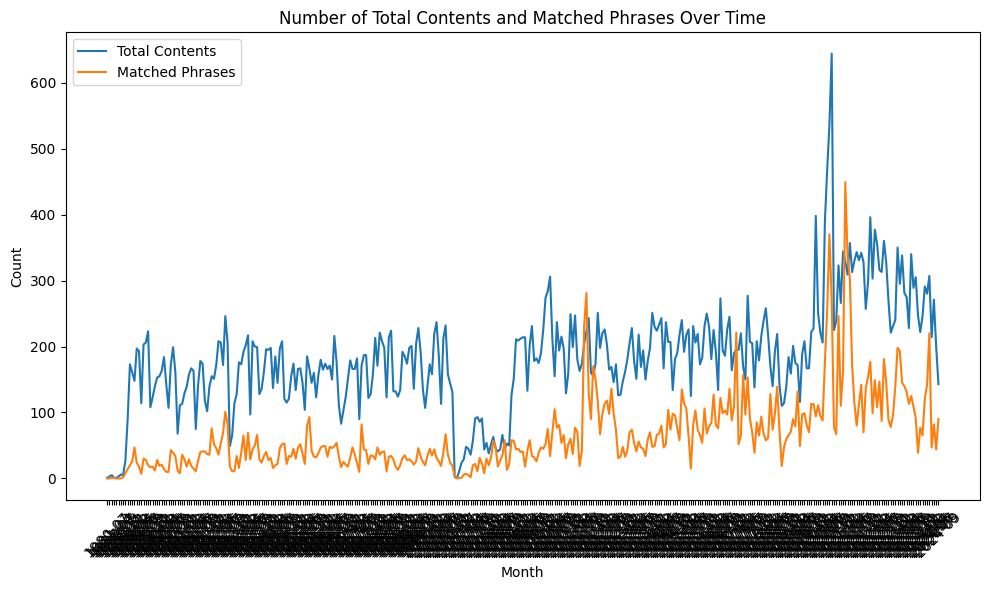

In [74]:
# Group by month and calculate the total contents and matched phrases
monthly_stats = df.groupby('Month').agg(
    total_contents=('Content', 'size'),
    matched_phrases=('matches', 'sum')
).reset_index()

# Plot the results as a line chart without dots at every point
plt.figure(figsize=(10, 6))
plt.plot(monthly_stats['Month'].astype(str), monthly_stats['total_contents'], label='Total Contents')
plt.plot(monthly_stats['Month'].astype(str), monthly_stats['matched_phrases'], label='Matched Phrases')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Total Contents and Matched Phrases Over Time')
plt.legend()
plt.tight_layout()
plt.show()


In [75]:
n = 20

# Find the top 3 months with the highest total_contents
top_total_contents = monthly_stats.nlargest(n, 'total_contents')

# Find the top 3 months with the highest matched_phrases
top_matched_phrases = monthly_stats.nlargest(n, 'matched_phrases')

# Display the results
print(f"Top {n} months by total contents:")
print(top_total_contents[['Month', 'total_contents']])

print(f"\nTop {n} months by matched phrases:")
print(top_matched_phrases[['Month', 'matched_phrases']])


Top 20 months by total contents:
       Month  total_contents
319  2020-10             644
318  2020-09             536
317  2020-08             467
312  2020-03             398
336  2022-03             396
316  2020-07             389
338  2022-05             377
342  2022-09             360
327  2021-06             357
339  2022-06             355
348  2023-03             350
324  2021-03             344
330  2021-09             343
332  2021-11             342
354  2023-09             340
350  2023-05             338
331  2021-10             331
329  2021-08             330
325  2021-04             329
333  2021-12             328

Top 20 months by matched phrases:
       Month  matched_phrases
325  2021-04              449
318  2020-09              370
326  2021-05              336
327  2021-06              303
211  2011-10              281
319  2020-10              270
317  2020-08              254
322  2021-01              246
210  2011-09              231
277  2017-04           

In [79]:
# Function to find and return the matched phrases from the Content
def find_matched_phrases(text, pattern):
    return pattern.findall(text)

# Apply the function to extract matched phrases for each row
df['matched_phrases_list'] = df['Content'].apply(lambda x: find_matched_phrases(x, miu_regex))

# Get rows with matched phrases (where 'matches' > 0)
matched_phrases_df = df[df['matches'] > 0]

# Get rows with no matched phrases (where 'matches' == 0)
not_matched_phrases_df = df[df['matches'] == 0]

# Show examples of matched phrases
print("Examples of Matched Phrases:")
print(matched_phrases_df[['Date', 'Content', 'matched_phrases_list']].head(5))  # Display first 5 examples

# Show examples of not matched phrases
print("\nExamples of Not Matched Phrases:")
print(not_matched_phrases_df[['Date', 'Content']].head(5))  # Display first 5 examples


In [78]:
print(matched_phrases_df.iloc[0]['Content'])

Let me just read a brief statement.
President Reagan has proclaimed May 1st as Law Day, U.S.A. The proclamation follows a 24-year tradition of annual reflection on the importance of rule of law in our society. And the theme this year is "Law-the Language of Liberty." This is especially appropriate for the first Law Day proclamation of a President whose eloquent articulation of the principles of individual liberty and freedom has been one of the hallmarks of his public service, public life.
The theme of law as the language of liberty calls to mind several points of particular current significance. One is the problem of violent crime. The rule of law represents the civil discourse of a free people. Violent crime is the uncivilized shout that threatens to drown out and ultimately silence the language of liberty. The events of last Monday were a tragic reminder as the violent act of one man sought tho hush the voice of the Nation as to who its leader would be. But no less tragic are the da